In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()

from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import seaborn as sns


/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-FSU53.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Tennessee95.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-WashU32.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-William77.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UPenn7.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine86.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-USF51.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Harvard1.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Emory27.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Lehigh96.SpaceOne
/cluster/s

In [15]:
n, d, tau, alpha = 3000, 2, 2.4, 100.0
d=2

g, edges, weights, pts, const = generation.generate_GIRG_nk(
    n, d, tau, alpha, weights=None, pts=None, desiredAvgDegree=60,
    points_type=points.PointsTorus2)

utils.LCC(g)

0.754296905522854

In [18]:
coreDec = nk.centrality.CoreDecomposition(g)
coreDec.run()
set(coreDec.scores())

{11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0}

In [22]:
# Choose and initialize algorithm
plmCommunities = nk.community.detectCommunities(g, algo=nk.community.PLM(g, True))
plmCommunities.numberOfSubsets()

Communities detected in 0.04894 [s]
solution properties:
-------------------  ------------
# communities            8
min community size     312
max community size     481
avg. community size    375
imbalance                1.28267
edge cut             30338
edge cut (portion)       0.333183
modularity               0.537115
-------------------  ------------


8

In [5]:
lccs = []
ds = [1,2,3,4,5,6,7,8,9,10]
for d in ds:
    g, edges, weights, pts, const = generation.generate_GIRG_nk(
    n, d, tau, alpha, weights=None, pts=None, desiredAvgDegree=60,
    points_type=points.PointsTorus2)

    lcc = utils.LCC(g)
    print(d, lcc)
    lccs.append(lcc)

1 0.8291135913571588
2 0.76913190294769
3 0.6756079399874572
4 0.6226867445898906
5 0.5017455832175853
6 0.3885286269518622
7 0.44125680806358997
8 0.4227935766446472
9 0.3820101817170639
10 0.3305305381163131


In [7]:
nk.globals.clustering(g)

0.32676105272300876

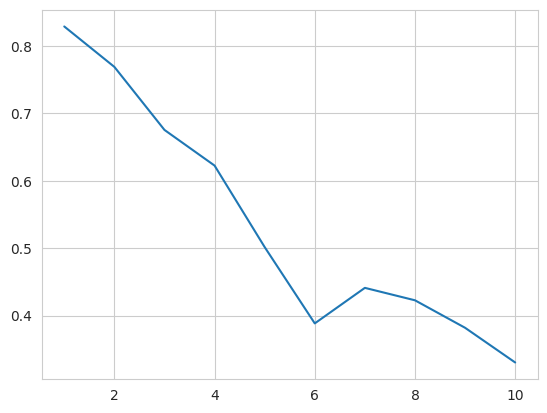

In [8]:
plt.plot(ds, lccs)

In [9]:
ds2 = [13, 16, 20, 25]
for d in ds2:
    g, edges, weights, pts, const = generation.generate_GIRG_nk(
    n, d, tau, alpha, weights=None, pts=None, desiredAvgDegree=60,
    points_type=points.PointsTorus2)

    lcc = utils.LCC(g)
    print(d, lcc)
    lccs.append(lcc)

13 0.24103167468547002
16 0.25977733764721456
20 0.29087754602079297
25 0.22991522651007829


Text(0.5, 0, 'd')

Text(0, 0.5, 'mean LCC')

Text(0.5, 1.0, 'LCC vs d for some n=3000 Max Torus GIRGs')

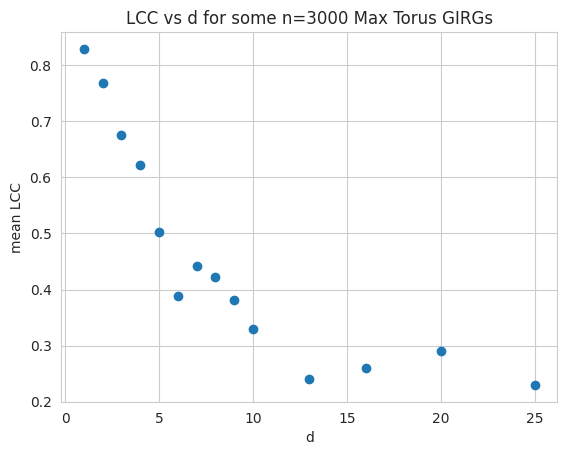

In [13]:
plt.plot(ds + ds2, lccs, 'o')
plt.xlabel('d')
plt.ylabel('mean LCC')
plt.title('LCC vs d for some n=3000 Max Torus GIRGs')
plt.savefig('/cluster/home/bdayan/girgs/thesis/figures/LCC_vs_d.png')

In [14]:
3

3